In [2]:
import logging
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils.arg_extract import get_args
from utils.experiment_evaluator import evaluate_experiment
from utils.experiment import Experiment
from argparse import Namespace
from utils.experiment_evaluator import image_prepro, create_evaluation_dataloader, get_test_predictions_pairs, save_sequence_plots
import os
from utils.io import save
plt.ioff()
from utils.io import load
batch_images_all = load('batches.pickle')

data_directory = '../experiments_results/'
experiments = [dI for dI in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, dI))]

In [19]:
exp = 'predrnn_batch_4_samples_5_in_5_out_20_normal_lr_0.0001_dataset_original_24h_patience_3'
model_name = 'Causal\nLSTM-R'
test_set = 'Test_2'

batch_images = batch_images_all[test_set]

# output_frames_int, target_frames = get_experiment_predictions(exp_name, batch_images, belated=False)
# output_frames_bel, target_frames = get_experiment_predictions(exp_name, batch_images, belated=True)

belated = True
dd = {'experiment_name': exp,
        'num_epochs': 1,
        'num_workers': 1,
        'test_starting_point': 15,
        'num_total_output_frames':80,
        'debug': False}

args_new = Namespace(**dd)
experiment = Experiment(args_new)
experiment.load_from_disk(test=True)

output_frames, target_frames = get_test_predictions_pairs(experiment.model, belated, 
                                                          batch_images, 
                                                          args_new.test_starting_point-experiment.args.num_input_frames, 
                                                          args_new.num_total_output_frames)
out_prepro = image_prepro(output_frames, experiment.normalizer), image_prepro(target_frames, experiment.normalizer)

In [20]:
batch_images_all.keys()

dict_keys(['Test_1', 'Test_2', 'Test_3', 'Lines_1', 'Lines_2', 'Lines_3', 'Double_Drop_1', 'Double_Drop_2', 'Double_Drop_3', 'Illumination_135_1', 'Illumination_135_2', 'Illumination_135_3', 'Illumination_Random_1', 'Illumination_Random_2', 'Illumination_Random_3', 'Shallow_Depth_1', 'Shallow_Depth_2', 'Shallow_Depth_3', 'Smaller_Tub_1', 'Smaller_Tub_2', 'Smaller_Tub_3', 'Bigger_Tub_1', 'Bigger_Tub_2', 'Bigger_Tub_3', 'Fixed_Tub_1', 'Fixed_Tub_2', 'Fixed_Tub_3'])

In [26]:
experiment.model

PredRNNPP(
  (lstm): ModuleList(
    (0): CausalLSTMCell(
      (conv_h): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_c): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_m): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_x): Conv2d(8, 448, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_o): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_1_1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): CausalLSTMCell(
      (conv_h): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_c): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_m): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_x): Conv2d(64, 448, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_o): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv_1_1

In [180]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.utils.data import DataLoader

# import torchvision.transforms as transforms
# import torchvision.datasets as datasets

# import matplotlib.pyplot as plt


# class MyModel(nn.Module):
#     def __init__(self):
#         super(MyModel, self).__init__()
#         self.conv1 = nn.Conv2d(1, 3, 3, 1, 1)
#         self.pool1 = nn.MaxPool2d(2)
#         self.conv2 = nn.Conv2d(3, 6, 3, 1, 1)
#         self.pool2 = nn.MaxPool2d(2)
        
#         self.conv_trans1 = nn.ConvTranspose2d(6, 3, 4, 2, 1)
#         self.conv_trans2 = nn.ConvTranspose2d(3, 1, 4, 2, 1)
        
#     def forward(self, x):
#         x = F.relu(self.pool1(self.conv1(x)))
#         x = F.relu(self.pool2(self.conv2(x)))        
#         x = F.relu(self.conv_trans1(x))
#         x = self.conv_trans2(x)
#         return x

# dataset = datasets.MNIST(
#     root='PATH',
#     transform=transforms.ToTensor(),
#     download=True,
# )
# loader = DataLoader(
#     dataset,
#     num_workers=2,
#     batch_size=8,
#     shuffle=True
# )

# model = MyModel()
# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-3)

# epochs = 1
# for epoch in range(epochs):
#     for batch_idx, (data, target) in enumerate(loader):
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output, data)
#         loss.backward()
#         optimizer.step()
        
#         print('Epoch {}, Batch idx {}, loss {}'.format(
#             epoch, batch_idx, loss.item()))

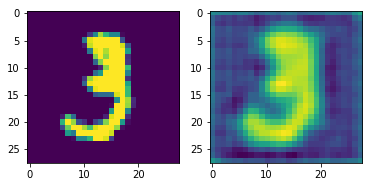

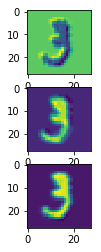

In [88]:
def normalize_output(img):
    img = img - img.min()
    img = img / img.max()
    return img

# Plot some images
idx = torch.randint(0, output.size(0), ())
pred = normalize_output(output[idx, 0])
img = data[idx, 0]

fig, axarr = plt.subplots(1, 2)
axarr[0].imshow(img.detach().numpy())
axarr[1].imshow(pred.detach().numpy())

# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
data, _ = dataset[10]
data.unsqueeze_(0)
output = model(data)

act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])
    
plt.show()

# Viz latent space of PredRNN

In [135]:
model = experiment.model
params = model.state_dict()

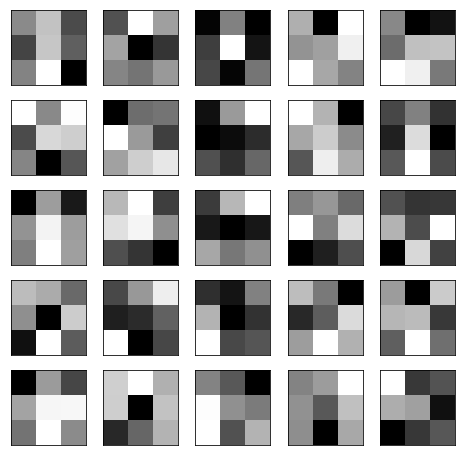

In [167]:
lines = 5
rows = 5

p0 = params['lstm.0.conv_h.weight']
fig, axarr = plt.subplots(lines, rows, figsize=(8, 8))

for i in range(lines):
    for k in range(rows):
        axarr[i, k].imshow(p0[i,k,:], cmap='gray')
        axarr[i, k].set_yticks([])
        axarr[i, k].set_xticks([])

plt.show()

In [176]:
model.lstm[0].conv_h

Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [186]:
starting_point = 0
num_total_output_frames = 3
model.eval()
num_input_frames = model.get_num_input_frames()
with torch.no_grad():
    input_end_point = starting_point + num_input_frames
    input_frames = batch_images[:1, starting_point:input_end_point, :, :].clone()
    output_frames = model.get_future_frames(input_frames, num_total_output_frames, belated)
    target_frames = batch_images[:1, input_end_point:(input_end_point + num_total_output_frames), :, :]

In [192]:
# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.lstm[0].conv_h.register_forward_hook(get_activation('lstm.0.conv_h'))
output = model.get_future_frames(input_frames, 1, belated)

In [202]:
act = activation['lstm.0.conv_h'].squeeze()
act.size()

torch.Size([256, 31, 31])

In [196]:
model.lstm[0].conv_h

Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

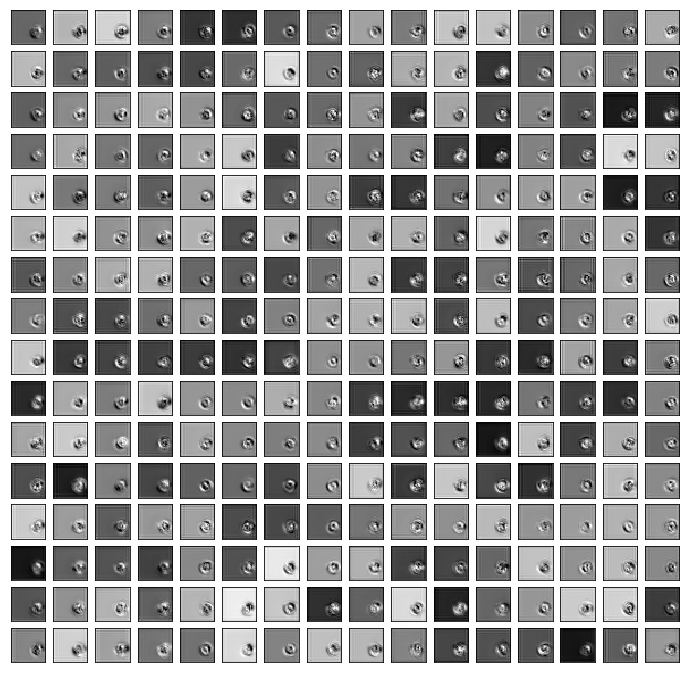

In [204]:
lines = 16
rows = 16

fig, axarr = plt.subplots(lines, rows, figsize=(12, 12))
for i in range(lines):
    for k in range(rows):
        axarr[i, k].imshow(act[i+rows*k,:], cmap='gray')
        axarr[i, k].set_yticks([])
        axarr[i, k].set_xticks([])

plt.show()

In [9]:
import ipywidgets
from ipywidgets import IntSlider
from ipywidgets import interact, interact_manual, interactive

In [205]:
def plot(k):
    diff_frame_int = diff_int[0,k,:,:]
    diff_frame_bel = diff_bel[0,k,:,:]
    vmin = diff_frame_int.min()
    vmax = diff_frame_bel.max()
    # for m in maps:

    plt.figure(figsize=(15,5))

    ax1=plt.subplot(1, 3, 1)
    ax2=plt.subplot(1, 3, 2)
    ax3=plt.subplot(1, 3, 3)

    ax1.imshow(output_frames_int[0,k,:,:], cmap='gray',vmin=0, vmax=1)
    ax2.imshow(output_frames_bel[0,k,:,:], cmap='gray',vmin=0, vmax=1)
    ax3.imshow(target_frames[0,k,:,:], cmap='gray', label='d')

    plt.figure(figsize=(15,5))


    ax1=plt.subplot(1, 3, 1)
    ax2=plt.subplot(1, 3, 2)
    ax3=plt.subplot(1, 3, 3)

    ax1.imshow(diff_frame_int, cmap='gray',vmin=vmin, vmax=vmax)
    ax2.imshow(diff_frame_bel, cmap='gray',vmin=vmin, vmax=vmax)
    ax3.imshow(diff_frame_bel-diff_frame_int, cmap='gray')